In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('dataset1.csv')

In [4]:
df.head()


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,12612628,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130708T120000,20130906T120000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20120130T000000,20120330T000000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000,20121221T150000,20130120T150000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500,20131208T150000,20140206T150000,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000,20130302T120000,20130501T120000,cv-library.co.uk


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 11 columns):
Id              55169 non-null int64
Title           55169 non-null object
Location        55169 non-null object
Company         51320 non-null object
ContractType    33493 non-null object
ContractTime    47047 non-null object
Category        55169 non-null object
Salary          53584 non-null object
OpenDate        55169 non-null object
CloseDate       55169 non-null object
Source          55169 non-null object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


In [29]:

# Convert TotalCharges column to numeric as it is detected as object
new_col = pd.to_numeric(df.iloc[:, 7], errors='coerce')


# Modify our dataframe to reflect the new datatype
df.iloc[:, 7] = pd.Series(new_col)

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy="mean")

df.iloc[:, 7] = imp.fit_transform(df.iloc[:, 7].values.reshape(-1,1))
df.iloc[:, 7] = pd.Series(df.iloc[:, 7])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55169 entries, 0 to 55168
Data columns (total 11 columns):
Id              55169 non-null int64
Title           55169 non-null object
Location        55169 non-null object
Company         51320 non-null object
ContractType    33493 non-null object
ContractTime    47047 non-null object
Category        55169 non-null object
Salary          55169 non-null float64
OpenDate        55169 non-null object
CloseDate       55169 non-null object
Source          55169 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


In [35]:
pd.set_option('precision',3)
df.describe()

,Id,Salary
count,5.517e+04,5.517e+04
mean,6.884e+07,3.430e+04
std,4.245e+06,6.209e+04
min,1.261e+07,0.000e+00
25%,6.835e+07,2.300e+04
50%,6.921e+07,3.200e+04
75%,7.123e+07,4.150e+04
max,7.271e+07,1.000e+07


In [37]:
import numpy as np
# Describe columns with objects
df.describe(exclude=np.number)

,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,Source
count,55169,55169,51320,33493,47047,55169,55169,55169,55169
unique,55166,489,9064,4,4,8,2194,2418,106
top,Senior Financial Advisor,UK,,,permanent,IT Jobs,20120415T150000,20131208T000000,totaljobs.com
freq,2,8397,1133,14902,33637,14344,45,45,10102


In [38]:
df.corr(method='pearson')

,Id,Salary
Id,1.000,0.017
Salary,0.017,1.000


In [55]:
df = df.drop('Id', axis=1)

In [56]:
display(df)

,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,Source
0,Engineering Systems Analyst,Dorking,Gregory Martin International,NaN,permanent,Engineering Jobs,25000.000,20130708T120000,20130906T120000,cv-library.co.uk
1,Stress Engineer Glasgow,Glasgow,Gregory Martin International,NaN,permanent,Engineering Jobs,30000.000,20120130T000000,20120330T000000,cv-library.co.uk
2,Modelling and simulation analyst,Hampshire,Gregory Martin International,NaN,permanent,Engineering Jobs,30000.000,20121221T150000,20130120T150000,cv-library.co.uk
3,Engineering Systems Analyst / Mathematical Mod...,Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,27500.000,20131208T150000,20140206T150000,cv-library.co.uk
4,"Pioneer, Miser Engineering Systems Analyst",Surrey,Gregory Martin International,NaN,permanent,Engineering Jobs,25000.000,20130302T120000,20130501T120000,cv-library.co.uk
5,Trainee Mortgage Advisor East Midlands,East Midlands,Brite Recruitment,NaN,permanent,Accounting & Finance Jobs,21000.000,20130103T000000,20130403T000000,cv-library.co.uk
6,"PROJECT ENGINEER, PHARMACEUTICAL",Witney,MatchBox Recruiting Ltd,NaN,permanent,Healthcare & Nursing Jobs,37500.000,20120412T150000,20120611T150000,cv-library.co.uk
7,Chef de Partie Award Winning Restaurant Exce...,Derby,Chef Results,-,-,Hospitality & Catering Jobs,16000.000,20130328T120000,20130527T120000,caterer.com
8,Quality Engineer,Gateshead,Asset Appointments,NaN,permanent,Engineering Jobs,22000.000,20131222T150000,20140220T150000,cv-library.co.uk
9,Chef de Partie Award Winning Dining Live In ...,UK,Chef Results,-,-,Hospitality & Catering Jobs,18000.000,20131219T000000,20140102T000000,caterer.com


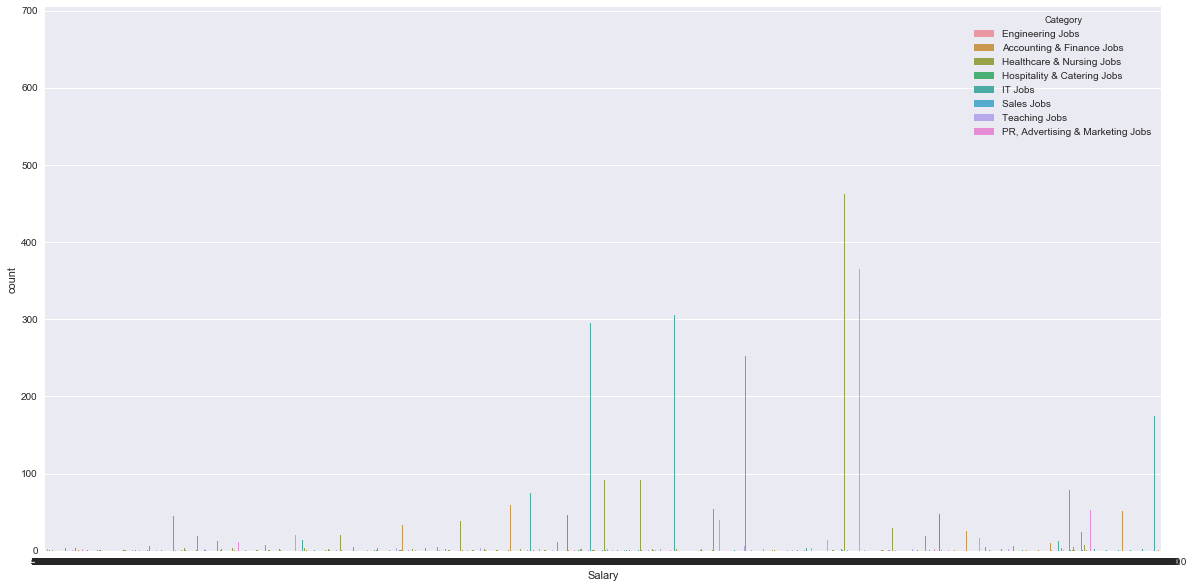

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="Salary", hue="Category", data=df)

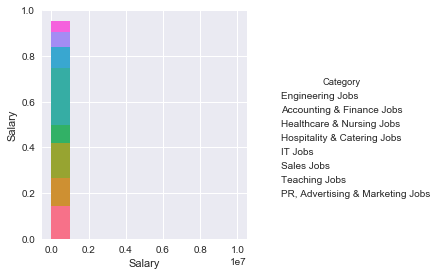

In [78]:
# Create Grid for pairwise relationships
gr = sns.PairGrid(df, size=4, hue="Category")
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()

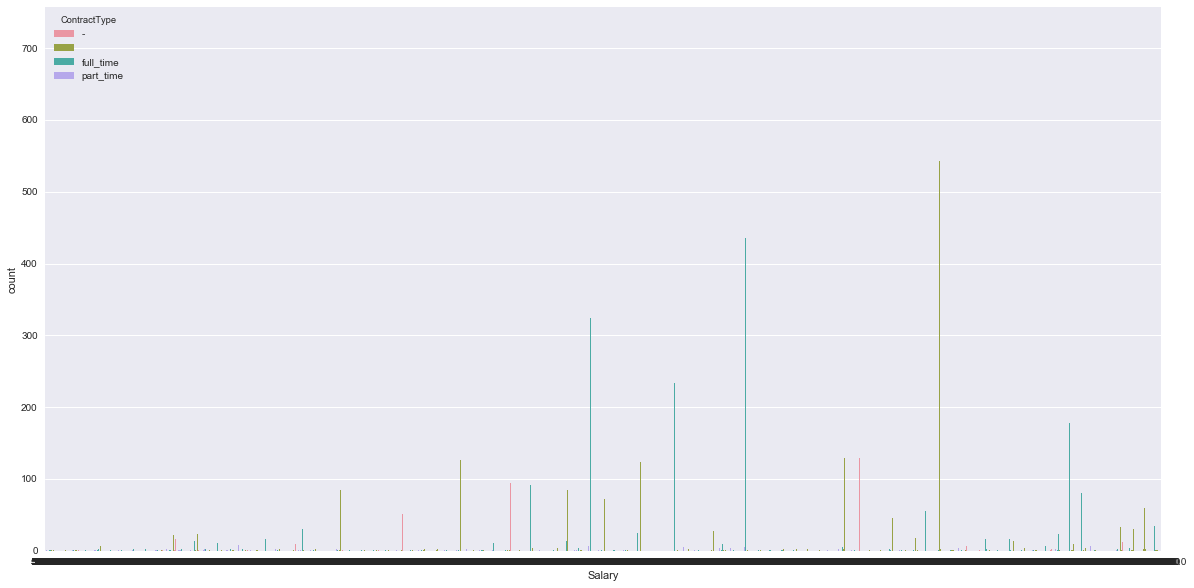

In [79]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="Salary", hue="ContractType", data=df)

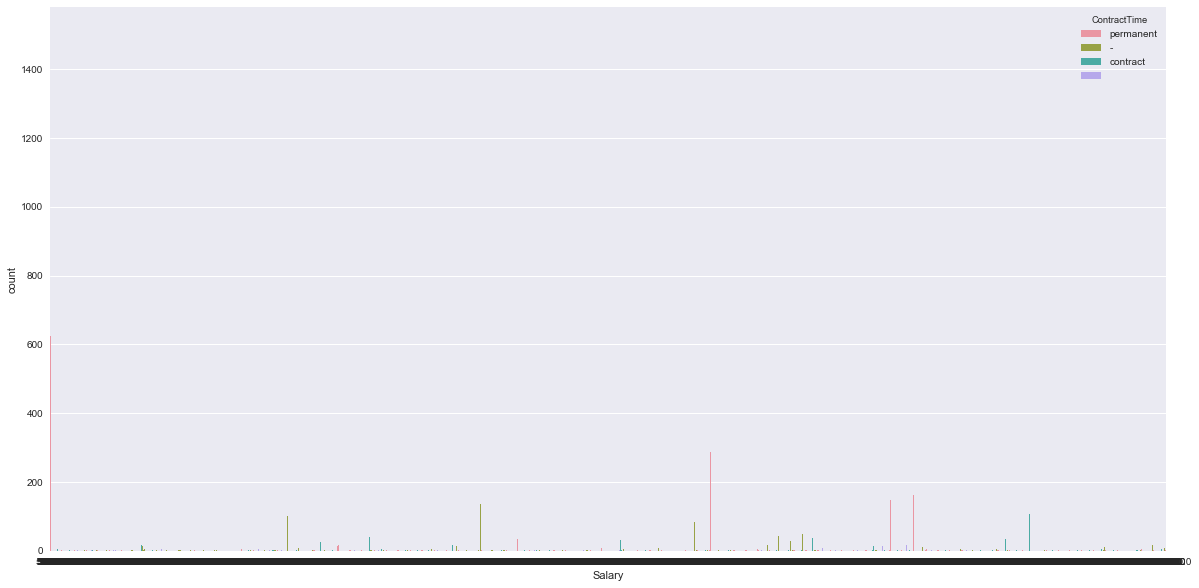

In [80]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="Salary", hue="ContractTime", data=df)

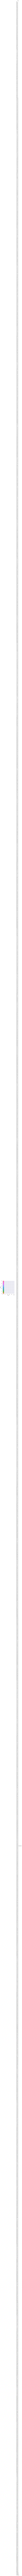

In [83]:
# Create Grid for pairwise relationships
gr = sns.PairGrid(df, size=4, hue="Salary")
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()


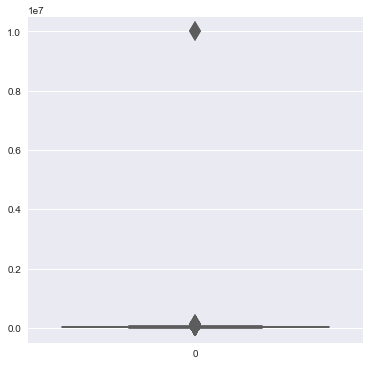

In [84]:
# Set up plot size
fig, ax = plt.subplots(figsize=(6,6))

# Attributes destribution
a = sns.boxplot(orient="v", palette="hls", data=df.iloc[:, 6], fliersize=14)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


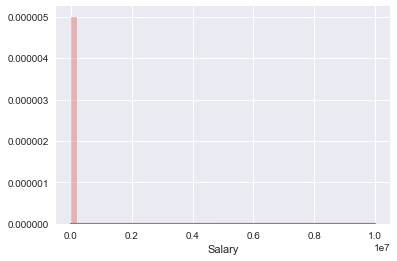

In [85]:
histogram = sns.distplot(df.iloc[:, 6], hist=True)
plt.show()

In [ ]:
# Use pandas get_dummies
df_encoded = pd.get_dummies(df)